In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from subprocess import check_output

%matplotlib inline

# correlation between features

In [5]:
with open('samples_60000.txt','rb') as file:
    samples_60000=pickle.load(file)
samples_60000

,Label,Source_following,Sink_following,Source_follower,Sink_follower,Shortest_path,CN,AAI,JC,PA,RA,HP,LHN,PageRank_Src,PageRank_Sink,ECentrality_Sour,ECentrality_Sink,Degree_Centrality_Sour,Degree_Centrality_Sink
0,1,3797,0,92,78,1,44,5.096773,0.011482,296166,0.009369,0.564103,0.000149,2.086225e-07,2.069415e-07,0.001057,1.402205e-03,7.990327e-04,1.602586e-05
1,1,3805,0,92,99,1,66,7.529112,0.017192,376695,0.011844,0.666667,0.000175,2.083902e-07,2.079313e-07,0.001156,1.374489e-03,8.006764e-04,2.034051e-05
2,1,37,0,10,2,1,1,0.275912,0.025641,74,0.026667,0.500000,0.013514,2.104510e-07,2.094847e-07,0.000099,1.691996e-05,9.656605e-06,4.109194e-07
3,1,3797,0,80,82,1,63,7.206129,0.016505,311354,0.011202,0.768293,0.000202,2.078218e-07,2.074085e-07,0.001048,1.097074e-03,7.965672e-04,1.684769e-05
4,1,4399,0,78,76,1,36,3.320151,0.008108,334324,0.000919,0.473684,0.000108,2.063073e-07,2.058303e-07,0.002824,2.441493e-03,9.198430e-04,1.561494e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,1,0,10,1,5,0,0.000000,0.000000,1,0.000000,0.000000,0.000000,2.200968e-07,2.047808e-07,0.000043,9.115991e-07,2.260056e-06,2.054597e-07
29996,0,70,0,23,7,3,0,0.000000,0.000000,490,0.000000,0.000000,0.000000,2.285158e-07,2.049167e-07,0.000154,2.831890e-04,1.910775e-05,1.438218e-06
29997,0,38,0,106,2,3,0,0.000000,0.000000,76,0.000000,0.000000,0.000000,2.600614e-07,2.052649e-07,0.000646,2.039260e-05,2.958619e-05,4.109194e-07
29998,0,0,0,4,1,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000,2.064072e-07,2.047578e-07,0.000006,4.221924e-05,8.218387e-07,2.054597e-07


In [6]:
sample_wo_label=samples_60000.drop(columns='Label')

In [7]:
cor= sample_wo_label.corr(method='pearson')
print(cor)

                        Source_following  Sink_following  Source_follower  \
Source_following                1.000000       -0.009449         0.750545   
Sink_following                 -0.009449        1.000000         0.008781   
Source_follower                 0.750545        0.008781         1.000000   
Sink_follower                   0.010556        0.724635         0.064937   
Shortest_path                  -0.172618       -0.171269        -0.316939   
CN                              0.274511        0.237860         0.472697   
AAI                             0.258222        0.226132         0.460240   
JC                             -0.081661        0.007643        -0.077313   
PA                              0.515948        0.066008         0.418669   
RA                              0.052488        0.093117         0.156960   
HP                              0.299999       -0.032439         0.508864   
LHN                            -0.047741       -0.044142        -0.077105   

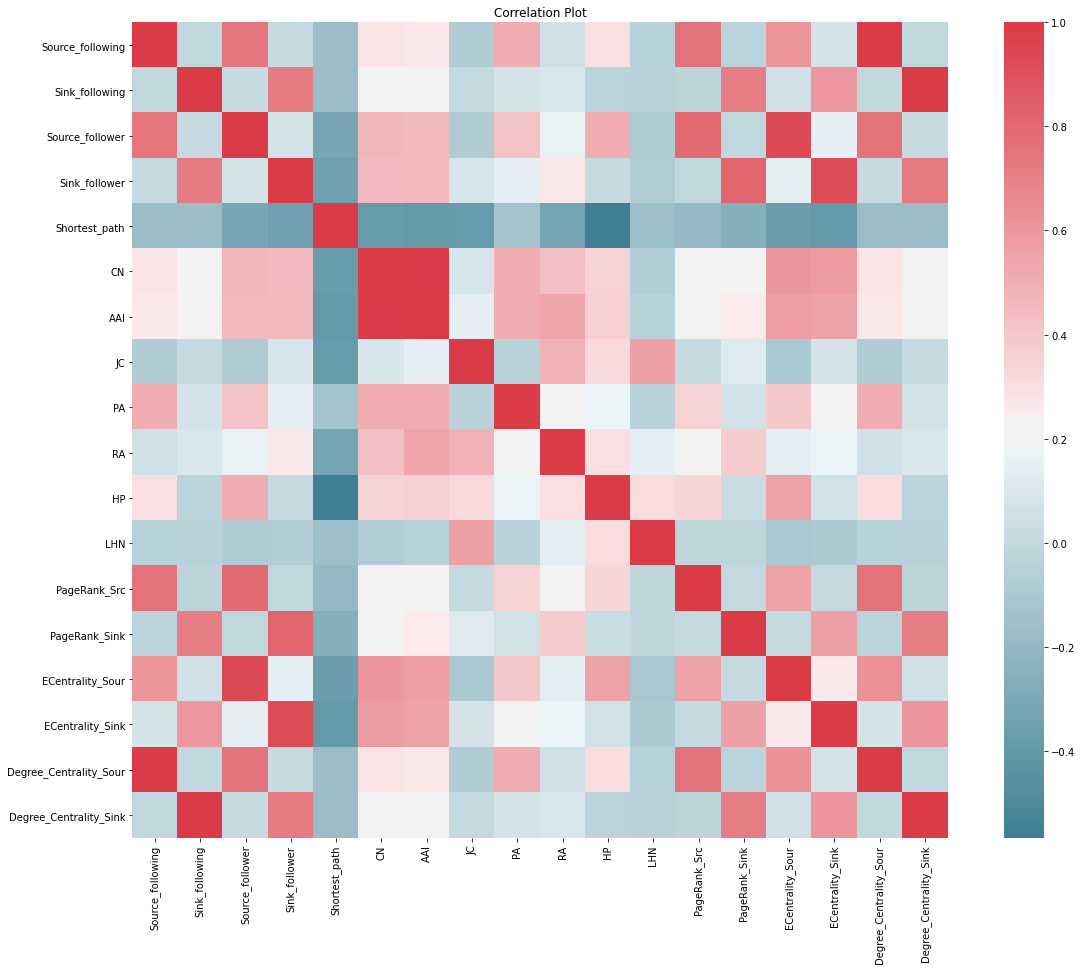

In [8]:
fig, ax =plt.subplots(figsize=(20, 15))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()